In [1]:
import torch.nn
import numpy as np
from torchesn.nn import ESN
from torchesn import utils
import time

In [2]:
device = torch.device('cpu')
dtype = torch.double
torch.set_default_dtype(dtype)

In [4]:
if dtype == torch.double:
    data = np.loadtxt('examples/datasets/mg17.csv', delimiter=',', dtype=np.float64)
elif dtype == torch.float:
    data = np.loadtxt('examples/datasets/mg17.csv', delimiter=',', dtype=np.float32)
X_data = np.expand_dims(data[:, [0]], axis=1)
Y_data = np.expand_dims(data[:, [1]], axis=1)
X_data = torch.from_numpy(X_data).to(device)
Y_data = torch.from_numpy(Y_data).to(device)

In [5]:
trX = X_data[:5000]
trY = Y_data[:5000]
tsX = X_data[5000:]
tsY = Y_data[5000:]

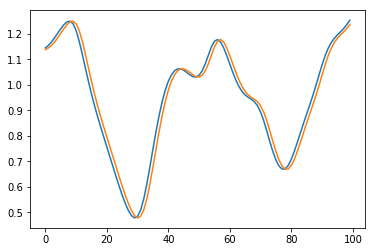

In [30]:
from matplotlib import pylab as plt
plt.plot(tsY[:100].squeeze().numpy())
plt.plot(tsX[:100].squeeze().numpy())

In [6]:
washout = [500]
input_size = output_size = 1
hidden_size = 500
loss_fcn = torch.nn.MSELoss()

In [7]:
start = time.time()

In [8]:
# Training
trY_flat = utils.prepare_target(trY.clone(), [trX.size(0)], washout)
model = ESN(input_size, hidden_size, output_size)
model.to(device)
model(trX, washout, None, trY_flat)
model.fit()
output, hidden = model(trX, washout)
print("Training error:", loss_fcn(output, trY[washout[0]:]).item())

Training error: 2.5355775986158652e-11


In [9]:
# Test
output, hidden = model(tsX, [0], hidden)
print("Test error:", loss_fcn(output, tsY).item())
print("Ended in", time.time() - start, "seconds.")

Test error: 3.2759047648610915e-11
Ended in 45.01115393638611 seconds.
